In [43]:
# importing libraries
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [44]:
# loading the input dataset
data = pd.read_excel('Real estate valuation data set.xlsx')
features = list(data)[1:]
x = np.array(data.iloc[:,1:-1])
y = np.array(data.iloc[:,-1])

In [45]:
#----- simple linear regression -----------

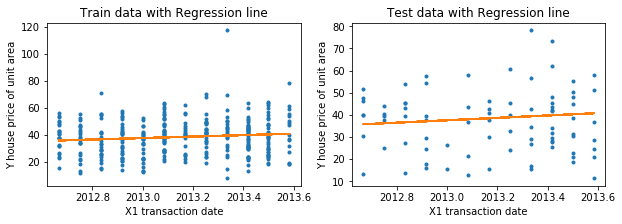

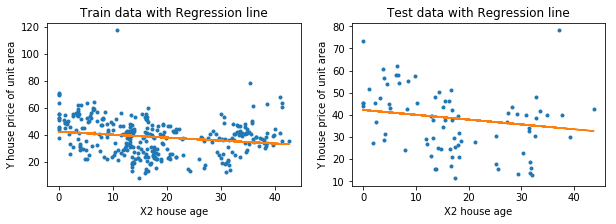

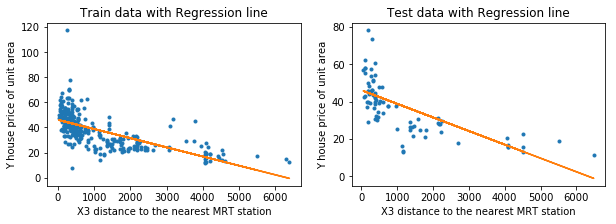

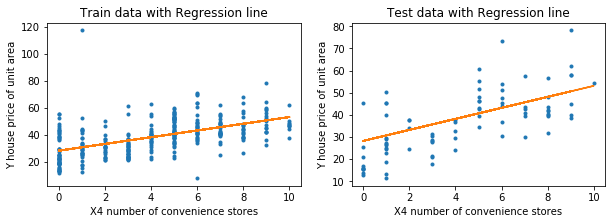

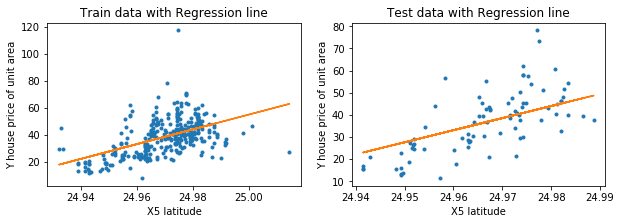

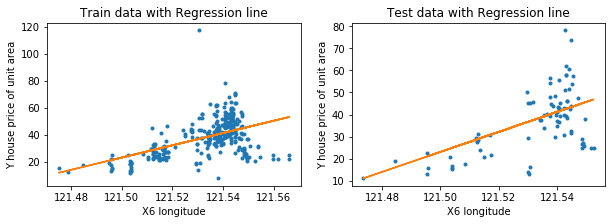

In [46]:
# for storing Root Mean Square errors
RMSE = {}

# Applying simple linear regression for every feature
for i in range(len(features)-1):
    
    # Splitting the train(80%) and test(20%) data
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(x[:,i],y,test_size=0.2,random_state=122)
    
    # calculating the co-efficients
    b1 = (sum(Xtrain)*sum(Ytrain) - len(Ytrain)*(Xtrain @ Ytrain))/(sum(Xtrain)**2 - len(Ytrain)*(Xtrain @ Xtrain))
    b0 = (sum(Ytrain)*(Xtrain @ Xtrain) - sum(Xtrain)*(Xtrain @ Ytrain))/(len(Ytrain)*(Xtrain @ Xtrain) - sum(Xtrain)**2)

    # plotting the regression line along with train and test data
    f = plt.figure(figsize=(10,3))
    ax1 = f.add_subplot(121)
    ax2 = f.add_subplot(122)

    # plotting the train data with regression line
    Ycalculated = b1*Xtrain + b0
    ax1.plot(Xtrain,Ytrain,'.')
    ax1.plot(Xtrain,Ycalculated)
    ax1.set_xlabel(features[i])
    ax1.set_ylabel(features[-1])
    ax1.set_title('Train data with Regression line')

    # plotting the test data with regression line
    Ycalculated = b1*Xtest + b0
    ax2.plot(Xtest,Ytest,'.')
    ax2.plot(Xtest,Ycalculated)
    ax2.set_xlabel(features[i])
    ax2.set_ylabel(features[-1])
    ax2.set_title('Test data with Regression line')
    
    # Root mean square error of predicted values
    RMSE[features[i]] = math.sqrt(sum([(i-j)**2 for i,j in zip(Ytest,Ycalculated)])/len(Ytest))

    plt.show()

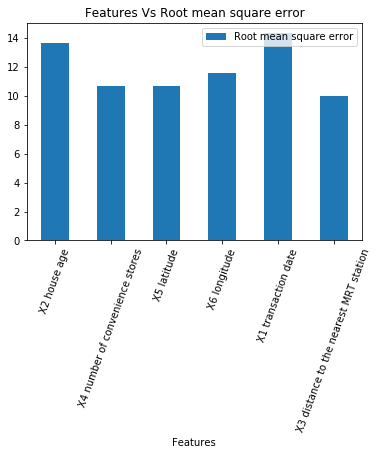

In [47]:
data ={'Features':list(RMSE.keys()),'Root mean square error':list(RMSE.values())}
dataFrame = pd.DataFrame(data=data)
dataFrame.plot.bar(x="Features", y="Root mean square error", rot=70, title="Features Vs Root mean square error")
plt.show(block=True)

In [48]:
# ---------- Multivariate linear regression ---------

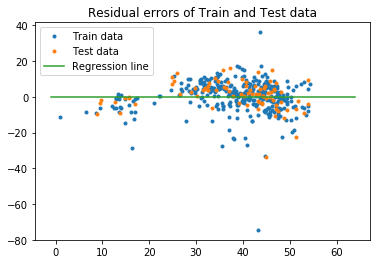

Root mean square error is :  7.820101399411647


In [49]:
# Splitting the train(80%) and test data(20%) 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size=0.2,random_state=122)

# feature matrix for train data
X = np.column_stack([np.ones(len(Xtrain)),Xtrain])

# co-efficient vector
beta = (np.linalg.inv(X.T @ X) @ X.T) @ Ytrain

# Regression line
Ycalculated = X @ beta
plt.plot(Ycalculated,Ycalculated-Ytrain,'.')

# feature matrix for test data
X = np.column_stack([np.ones(len(Xtest)),Xtest])
Ycalculated = X @ beta

# plotting the residual errors
# residual errors -> deviaton from the regression line(predicted values)
plt.plot(Ycalculated,Ycalculated-Ytest,'.')
plt.plot([min(Ycalculated)-10,max(Ycalculated)+10],[0,0])
plt.legend(['Train data','Test data','Regression line'])
plt.title('Residual errors of Train and Test data')
plt.show()

# Root mean square error
RMSE = math.sqrt(sum([(i-j)**2 for i,j in zip(Ytest,Ycalculated)])/len(Ytest))
print('Root mean square error is : ',RMSE)

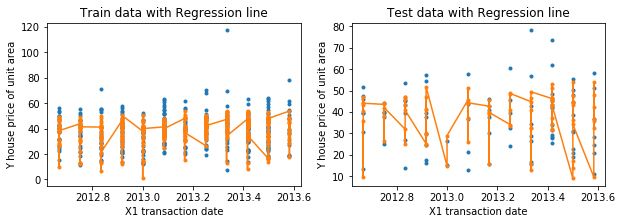

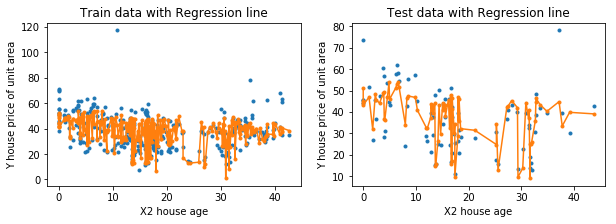

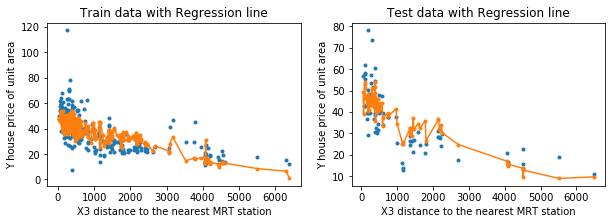

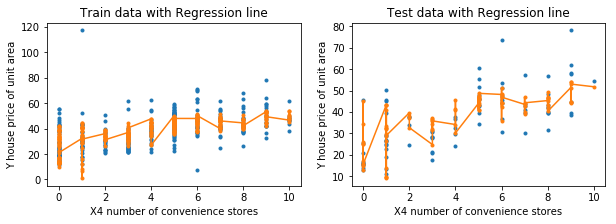

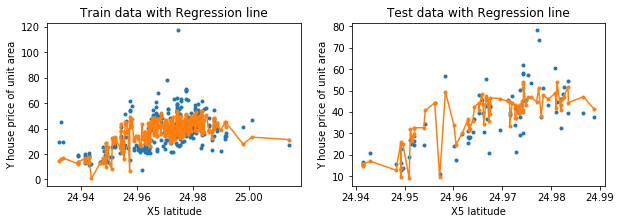

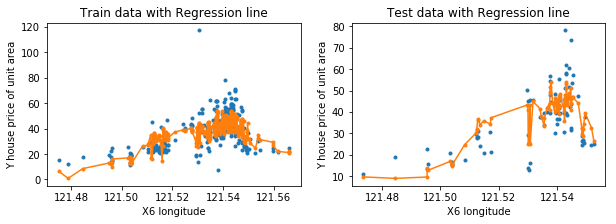

In [50]:
# Regression line
X = np.column_stack([np.ones(len(Xtrain)),Xtrain])
beta = (np.linalg.inv(X.T @ X) @ X.T) @ Ytrain
YcalculatedTrain = X @ beta

# calculating values using regression line
X = np.column_stack([np.ones(len(Xtest)),Xtest])
YcalculatedTest = X @ beta

# Since, multivariate regression line cannot be plotted for many features,
# plotting the regression line with respect to every feature with train and test data

for i in range(len(features)-1):

    # for plotting side-by-side
    f = plt.figure(figsize=(10,3))
    ax1 = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    
    # sorting for clean regression line
    arr1inds = Xtrain[:,i].argsort()
    sorted_arr1 = Xtrain[:,i][arr1inds[::-1]]
    sorted_arr2 = YcalculatedTrain[arr1inds[::-1]]
    sorted_arr3 = Ytrain[arr1inds[::-1]]
    
    # plotting the Train data with regression line
    ax1.plot(sorted_arr1,sorted_arr3,'.')
    ax1.plot(sorted_arr1,sorted_arr2,'.-')
    ax1.set_xlabel(features[i])
    ax1.set_ylabel(features[-1])
    ax1.set_title('Train data with Regression line')
    
    # sorting for clean regression line
    arr1inds = Xtest[:,i].argsort()
    sorted_arr1 = Xtest[:,i][arr1inds[::-1]]
    sorted_arr2 = YcalculatedTest[arr1inds[::-1]]
    sorted_arr3 = Ytest[arr1inds[::-1]]

    # plotting the Test data with regression line
    ax2.plot(sorted_arr1,sorted_arr3,'.')
    ax2.plot(sorted_arr1,sorted_arr2,'.-')
    ax2.set_xlabel(features[i])
    ax2.set_ylabel(features[-1])
    ax2.set_title('Test data with Regression line')
    
    plt.show()